## Graph Concepts

In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from nose.tools import assert_equal, assert_is_instance, assert_true
from numpy.testing import assert_array_equal, assert_array_almost_equal

### Directed graph

In [5]:
def make_circular_dg():
    '''
    Creates a directed graph with 22 integer nodes.
    Every node that is divisible by 3 is connected to the next integer node
    that is divisible by 3.
    
    Paramters
    ---------
    None
    
    Returns
    -------
    A networkx.Digraph instance.
    '''
    
    dg = nx.DiGraph()  
    dg.add_nodes_from(range(22))
    dg.add_edges_from([(0,3),(3,6),(6,9),(9,12),(12,15),(15,18),(18,21)])
    return dg

In [6]:
dg = make_circular_dg()

In [7]:
assert_is_instance(dg, nx.DiGraph)

nodes = np.array(dg.nodes())
assert_equal(nodes.size, 22)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 21)
assert_true(np.all(np.diff(nodes) == 1))

edges = np.array(dg.edges())
assert_equal(edges.shape[0], 7)
assert_equal(edges.shape[1], 2)
assert_equal(edges[:, 0].min(), 0)
assert_equal(edges[:, 0].max(), 18)
assert_true(np.all(np.diff(edges[:, 0]) == 3))
assert_equal(edges[:, 1].min(), 3)
assert_equal(edges[:, 1].max(), 21)
assert_true(np.all(np.diff(edges[:, 1]) == 3))

In [20]:
def draw_circular_dg(dg):
    '''
    Draws a directed graph.
    
    Paramters
    ---------
    dg: A networkx.DiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    fig, ax=plt.subplots(figsize=(8, 8))
    pos=nx.circular_layout(dg)
    nx.draw_networkx(dg, pos,node_color='b')
    nx.draw_networkx_labels(dg, pos)
    return ax

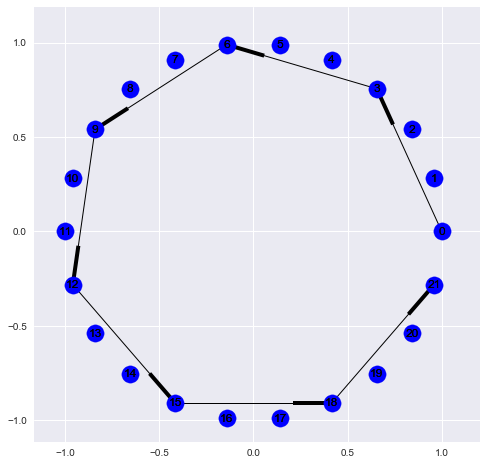

In [21]:
ax1 = draw_circular_dg(dg)
plt.show()

In [22]:
pos = np.array(list(nx.circular_layout(dg).values()))
assert_is_instance(ax1, mpl.axes.Axes)
assert_array_almost_equal(ax1.collections[0].get_offsets(), pos)
for idx, seg in enumerate(ax1.collections[1].get_segments()):
    line = np.vstack((pos[idx * 3], pos[idx * 3 + 3]))
    assert_array_almost_equal(seg, line)
assert_equal(len(ax1.collections[2].get_segments()), 7)

### Multigraph

In [42]:
def make_multigraph():
    '''
    Creates an undirected multigraph with seven nodes.
    
    Paramters
    ---------
    None
    
    Returns
    -------
    A networkx.MultiGraph instance.
    '''
    
    mg = nx.MultiGraph()
    mg.add_nodes_from(range(7))
    return mg

In [43]:
mg0 = make_multigraph()

In [44]:
assert_is_instance(mg0, nx.MultiGraph)

nodes = np.array(mg0.nodes())
assert_equal(nodes.size, 7)
assert_equal(nodes.min(), 0)
assert_equal(nodes.max(), 6)
assert_true(np.all(np.diff(nodes) == 1))

assert_equal(len(mg0.edges()), 0)

In [45]:
def draw_multigraph(mg):
    '''
    Draws a multigraph in circular format.
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    fig, ax=plt.subplots(figsize=(5, 5))
    nx.draw_circular(mg, with_labels=True)
    return ax

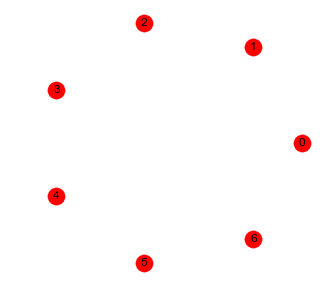

In [46]:
ax2 = draw_multigraph(mg0)
plt.show()

In [47]:
pos = np.array(list(nx.circular_layout(mg0).values()))
assert_is_instance(ax2, mpl.axes.Axes)
assert_equal(len(ax2.collections), 1)
assert_equal(len(ax2.collections[0].get_offsets()), len(mg0.nodes()))

### Add edges

In [48]:
def add_edges(mg):
    '''
    Adds new edges between all even integer nodes (0, 2, 4, 6)
    and between all odd integer nodes (1, 3, 5).
    
    Paramters
    ---------
    mg: A networkx.MultiGraph instance.
    
    Returns
    -------
    A matplotlib.Axes instance.
    '''
    
    mg.add_edges_from([(0,2),(0,4),(0,6),(2,4),(2,6),(4,6),(1,3),(1,5),(3,5)])
    return mg

In [49]:
mg1 = add_edges(mg0)

In [50]:
assert_is_instance(mg1, nx.MultiGraph)

nodes = np.array(mg1.nodes())
assert_array_equal(mg1.nodes(), mg0.nodes())

edges = np.array(mg1.edges())
assert_equal(edges.shape[0], 9)
assert_equal(edges.shape[1], 2)
assert_true(np.all((edges[:, 1] - edges[:, 0]) % 2 == 0))

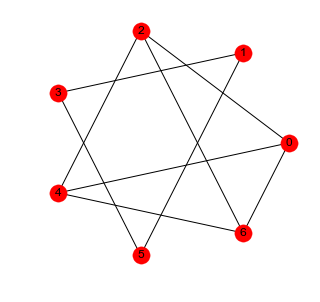

In [51]:
ax3 = draw_multigraph(mg1)
plt.show()

In [53]:
pos = np.array(list(nx.circular_layout(mg1).values()))
assert_is_instance(ax3, mpl.axes.Axes)
assert_equal(len(ax3.collections), 2) 
assert_array_almost_equal(ax3.collections[0].get_offsets(), pos)
assert_equal(len(ax3.collections[1].get_segments()), len(mg1.edges()))